In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
def class_name(int):
  names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
  return names[int]

In [3]:
from tensorflow.keras.datasets import cifar10

In [70]:
class_name(3)

'cat'

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train[0].shape

(32, 32, 3)

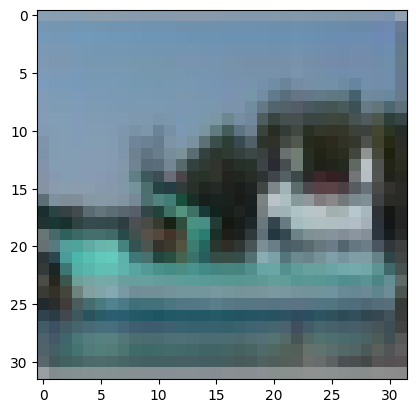

In [18]:
plt.imshow(X_train[111])

In [20]:
X_train[0].max()

np.uint8(255)

In [21]:
X_train = X_train/255

In [22]:
X_test = X_test/255

In [23]:
X_test.shape

(10000, 32, 32, 3)

In [24]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_cat_train = to_categorical(y_train,10)

In [27]:
y_cat_test = to_categorical(y_test,10)


In [28]:
y_test[0]

array([3], dtype=uint8)

In [29]:
y_train[0]

array([6], dtype=uint8)

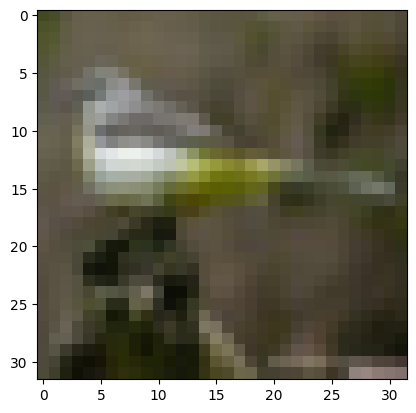

In [45]:
plt.imshow(X_train[57])

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [48]:
32*32*3

3072

In [49]:
model = Sequential()

# CONVOLUTION LAYER
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation="relu", ))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTION LAYER
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation="relu", ))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [53]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.3918 - loss: 1.6732 - val_accuracy: 0.5297 - val_loss: 1.3207
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5880 - loss: 1.1752 - val_accuracy: 0.6153 - val_loss: 1.0890
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 44ms/step - accuracy: 0.6504 - loss: 0.9948 - val_accuracy: 0.6450 - val_loss: 1.0099
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.6942 - loss: 0.8779 - val_accuracy: 0.6484 - val_loss: 1.0098
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.7310 - loss: 0.7680 - val_accuracy: 0.6657 - val_loss: 0.9624
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7595 - loss: 0.6816 - val_accuracy: 0.6687 - val_loss: 0.9675
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.7905 - loss: 0.5989 - val_accuracy: 0.6678 - val_loss: 0.9974


In [54]:
metrics = pd.DataFrame(model.history.history)

In [55]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.46950,1.472924,0.5297,1.320669
1,0.59726,1.144462,0.6153,1.088982
2,0.65426,0.983946,0.6450,1.009871
3,0.69420,0.876739,0.6484,1.009788
4,0.72612,0.780655,0.6657,0.962400
5,0.75604,0.696210,0.6687,0.967468
6,0.78402,0.614634,0.6678,0.997359


In [56]:
metrics.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

<Axes: >

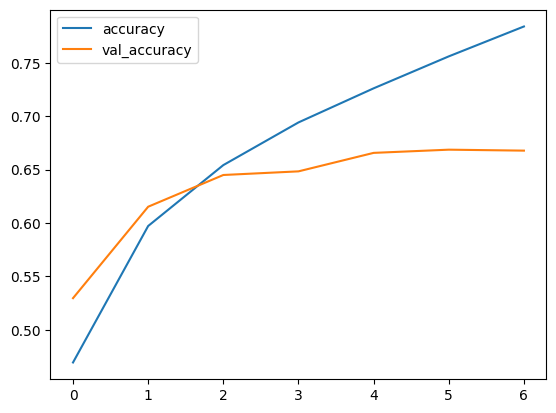

In [57]:
metrics[["accuracy", "val_accuracy"]].plot()

<Axes: >

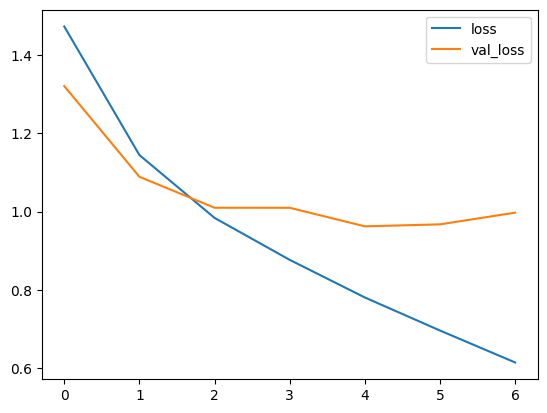

In [59]:
metrics[["loss", "val_loss"]].plot()

In [60]:
metrics[["loss", "val_loss"]]

,loss,val_loss
0,1.472924,1.320669
1,1.144462,1.088982
2,0.983946,1.009871
3,0.876739,1.009788
4,0.780655,0.962400
5,0.696210,0.967468
6,0.614634,0.997359


In [61]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9973588585853577, 0.6678000092506409]

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
predictions = np.argmax(model.predict(X_test),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [67]:
predictions

array([5, 8, 8, ..., 5, 4, 7])

In [68]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.51      0.64      1000
           1       0.81      0.75      0.78      1000
           2       0.55      0.57      0.56      1000
           3       0.45      0.59      0.51      1000
           4       0.67      0.61      0.64      1000
           5       0.56      0.56      0.56      1000
           6       0.79      0.75      0.77      1000
           7       0.74      0.73      0.73      1000
           8       0.72      0.80      0.76      1000
           9       0.69      0.81      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [71]:
confusion_matrix(y_test, predictions)

array([[510,  28, 101,  58,  25,  20,   6,   8, 168,  76],
       [  4, 750,   8,  19,   5,   6,  13,   6,  43, 146],
       [ 29,   6, 571, 117,  77,  72,  61,  35,  18,  14],
       [ 10,   9,  61, 595,  51, 160,  40,  36,  10,  28],
       [  7,   3,  97,  89, 606,  57,  42,  71,  19,   9],
       [  4,   5,  56, 235,  36, 556,  19,  71,   4,  14],
       [  3,   5,  63, 100,  24,  25, 746,  15,   9,  10],
       [  6,   5,  41,  47,  65,  78,   6, 729,   4,  19],
       [ 17,  48,  19,  28,  12,  10,   5,   6, 803,  52],
       [  8,  63,  14,  32,   3,  14,   5,  13,  36, 812]])

<Axes: >

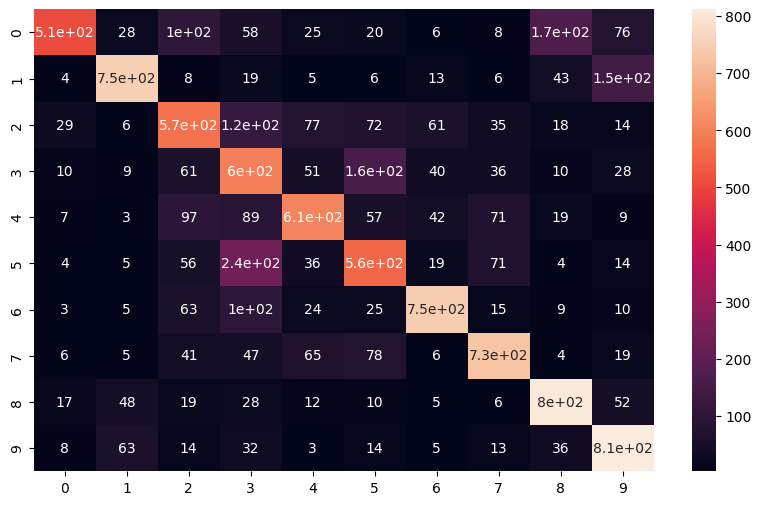

In [74]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [82]:
my_image = X_test[2]

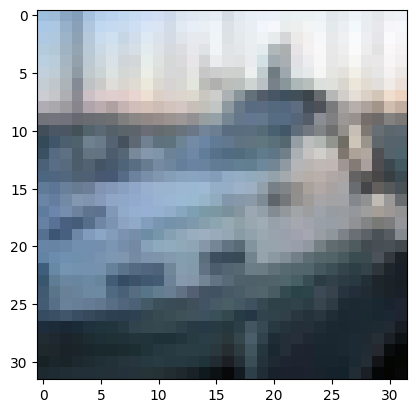

In [83]:
plt.imshow(my_image)

In [84]:
y_test[2]

array([8], dtype=uint8)

In [86]:
class_name(8)

'ship'

In [87]:
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


np.int64(8)